<a href="https://colab.research.google.com/github/zar7364/Classification_Apps_Accuracy_Prediction/blob/main/Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive

In [21]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [22]:
data=("/content/drive/My Drive/Colab Notebooks/Medical Cost Prediction/insurance.csv")

In [23]:
import pandas as pd

In [24]:
df=pd.read_csv(data)

In [25]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [28]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [39]:
df.pivot(columns='smoker', values='charges').count()

smoker
no     1064
yes     274
dtype: int64

In [41]:
df.smoker.count()

1338

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

In [52]:
df['smoker1']=le.fit_transform(df['smoker'])
df['sex1']=le.fit_transform(df['sex'])
df['region1']=le.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges,smoker1,sex1,region1
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,3
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [53]:
import seaborn as sns

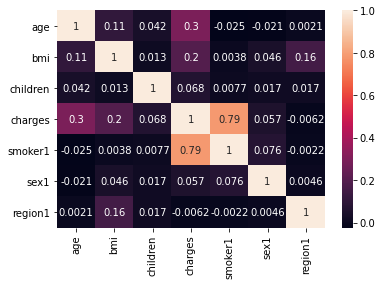

In [55]:
sns.heatmap(df.corr(),annot=True)

In [56]:
df.describe().columns

Index(['age', 'bmi', 'children', 'charges', 'smoker1', 'sex1', 'region1'], dtype='object')

In [62]:
#Split Dataset
X=df[['age','bmi','children','smoker1','sex1','region1']]
Y=df['charges']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=12)

In [66]:
Y_pred=model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score

In [79]:
Y_test.shape,Y_pred.shape

((268,), (268,))

In [82]:
print("Nilai Akurasi Model yaitu :", model.score(X_test,Y_test))

Nilai Akurasi Model yaitu : 0.7096380405273459
